In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset as dataframe
df = pd.read_csv('ds_salaries.csv')

In [3]:
#Show dimensions of dataframe
df.shape

(607, 12)

In [65]:
#Give me the 1st 5 rows
df.head()

,SalaryPaidYear,experience_level,employment_type,job_title,salary,salary_currency,SalaryOnDollars,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full time,Data Scientist,70000,EUR,79833,DE,0,DE,Large(>250)
1,2020,Senior,Full time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small(<50)
2,2020,Senior,Full time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium(50-250)
3,2020,Mid,Full time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small(<50)
4,2020,Senior,Full time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large(>250)


In [5]:
#Information's Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# Dropping unnecessary features
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)

In [66]:
#Give some statistical parameters
df.describe()

,SalaryPaidYear,salary,SalaryOnDollars,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
#Rename some features with a much more clear name
df = df.rename(columns={
    'work_year': 'SalaryPaidYear',
    'salary_in_usd': 'SalaryOnDollars'
})

In [8]:
#Give the names of the features
df.columns

Index(['SalaryPaidYear', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'SalaryOnDollars', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
experience_mapping = {
    'EN': 'Entry-level','SE': 'Senior','MI':'Mid','EX':'Expert'}
feature_name = 'experience_level'
df['experience_level'] = df['experience_level'].replace(experience_mapping)

In [10]:
df['experience_level'].unique()

array(['Mid', 'Senior', 'Entry-level', 'Expert'], dtype=object)

In [11]:
employment_mapping = {
    'FT': 'Full time','CT': 'Contract','PT':'Part time','FL':'Freelancer'}
feature_name = 'employment_type'
df['employment_type'] = df['employment_type'].replace(employment_mapping)

In [12]:
df['employment_type'].unique()

array(['Full time', 'Contract', 'Part time', 'Freelancer'], dtype=object)

In [13]:
df['job_title'].nunique()

50

In [14]:
compsize_mapping = {
    'L': 'Large(>250)','S': 'Small(<50)','M':'Medium(50-250)'}
feature_name = 'company_size'
df['company_size'] = df['company_size'].replace(compsize_mapping)

In [15]:
df['company_size'].unique()

array(['Large(>250)', 'Small(<50)', 'Medium(50-250)'], dtype=object)

In [16]:
df['SalaryPaidYear'].unique()

array([2020, 2021, 2022], dtype=int64)

In [17]:
df['salary_currency'].nunique()

17

In [18]:
df["employee_residence"].nunique()

57

Data Visualizations

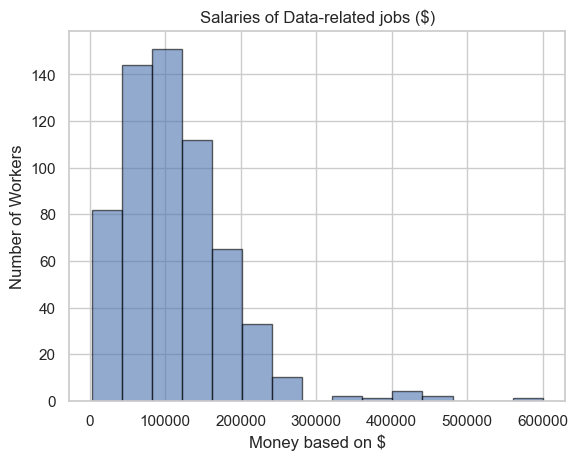

In [67]:
#histogram
plt.hist(df['SalaryOnDollars'], bins=15, edgecolor = 'black', alpha = 0.6)
plt.xlabel('Money based on $')
plt.ylabel('Number of Workers')
plt.title("Salaries of Data-related jobs ($)")
plt.show()

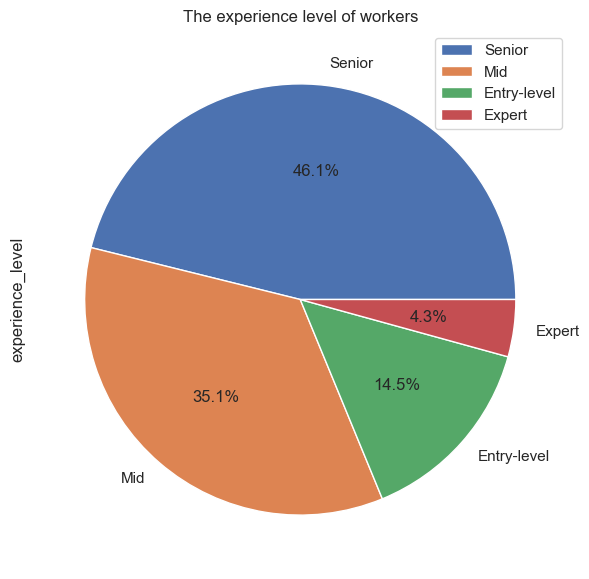

In [68]:
#pie chart
counts_experience = df['experience_level'].value_counts()
counts_experience.plot.pie(autopct='%.1f%%', figsize=(7,7))
new_labels = ['Senior','Mid', 'Entry-level', 'Expert']
plt.legend(new_labels, loc='best')
plt.title('The experience level of workers')
plt.show()

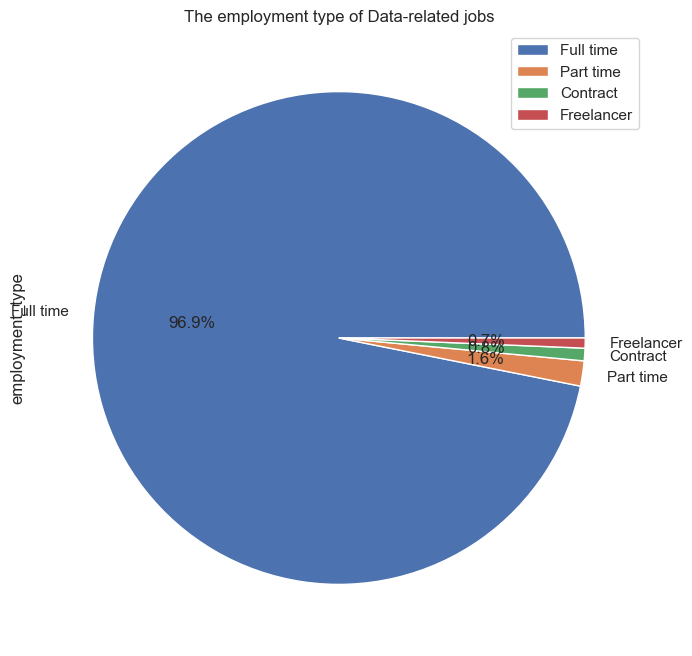

In [69]:
#pie chart
counts_experience = df['employment_type'].value_counts()
counts_experience.plot.pie(autopct='%.1f%%', figsize=(8,8))
new_labels = ['Full time', 'Part time','Contract', 'Freelancer']
plt.legend(new_labels, loc='best')
plt.title('The employment type of Data-related jobs')
plt.show()

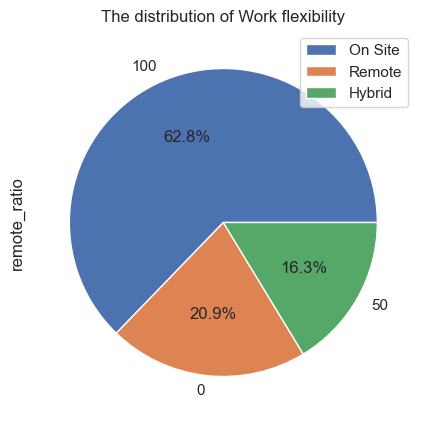

In [70]:
#pie chart
counts_remote = df['remote_ratio'].value_counts()
counts_remote.plot.pie(autopct='%.1f%%', figsize=(5,5))
new_labels = ['On Site', 'Remote', 'Hybrid']
plt.legend(new_labels, loc='best')
plt.title('The distribution of Work flexibility')
plt.show()

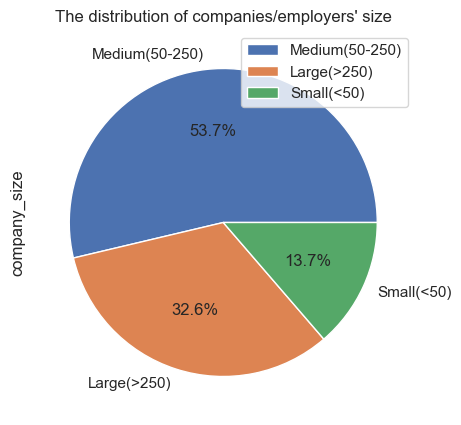

In [71]:
#pie chart
counts_size = df['company_size'].value_counts()
counts_size.plot.pie(autopct='%.1f%%', figsize=(5,5))
plt.title('The distribution of companies/employers\' size')
new_labels = ['Medium(50-250)','Large(>250)', 'Small(<50)']
plt.legend(new_labels, loc='best')
plt.show()

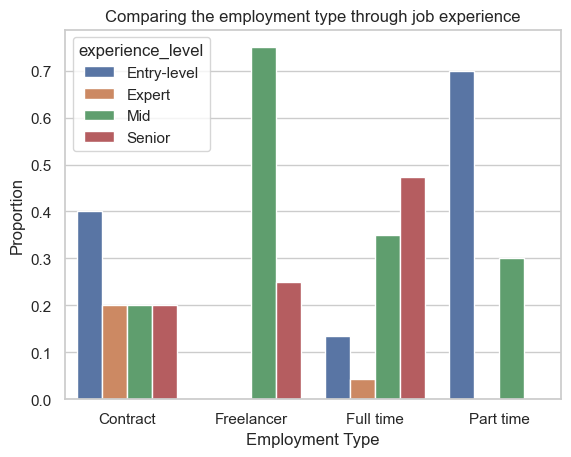

In [74]:
#Barplot
df1 = df.groupby(['employment_type', 'experience_level']).size().reset_index(name='counts')
df1['total'] = df1.groupby(['employment_type'])['counts'].transform('sum')
df1['proportion'] = df1['counts'] / df1['total']
sns.barplot(x='employment_type', y='proportion', hue='experience_level', data=df1)
plt.xlabel('Employment Type')
plt.ylabel('Proportion')
plt.title('Comparing the employment type through job experience')
plt.show()

In [79]:
#Data Roles and the # of workers have this position
df2 =df['job_title'].value_counts()
df2.head()

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

In [78]:
#Add columns' names  
df3 = pd.DataFrame({'Data Roles':df2.index, 'Number of Workers':df2.values})
df3.head()

,Data Roles,Number of Workers
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


Text(0.5, 1.0, 'The distribution of Data-Related Jobs in Industry')

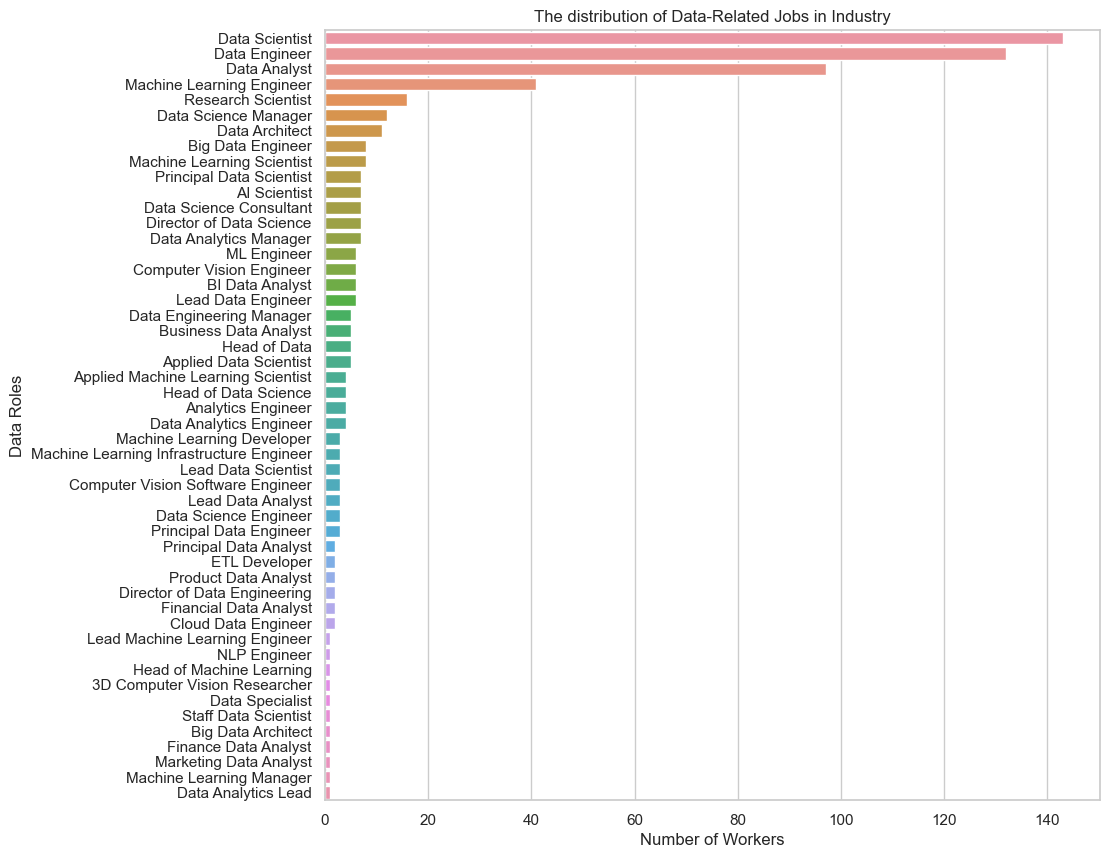

In [27]:
#Barplot
plt.figure(figsize = (10,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y=df3['Data Roles'], x= df3['Number of Workers'], data=df3)
plt.title('The distribution of Data-Related Jobs in Industry')

In [80]:
#Create a dataframe of company_location and their total number per country
df4 = df['company_location'].value_counts()
df4 = pd.DataFrame({'Company Location':df4.index, 'Number of Companies':df4.values})

In [81]:
df4.head()

,Company Location,Number of Companies
0,US,355
1,GB,47
2,CA,30
3,DE,28
4,IN,24


Text(0.5, 1.0, 'The distribution of Company location worldwile')

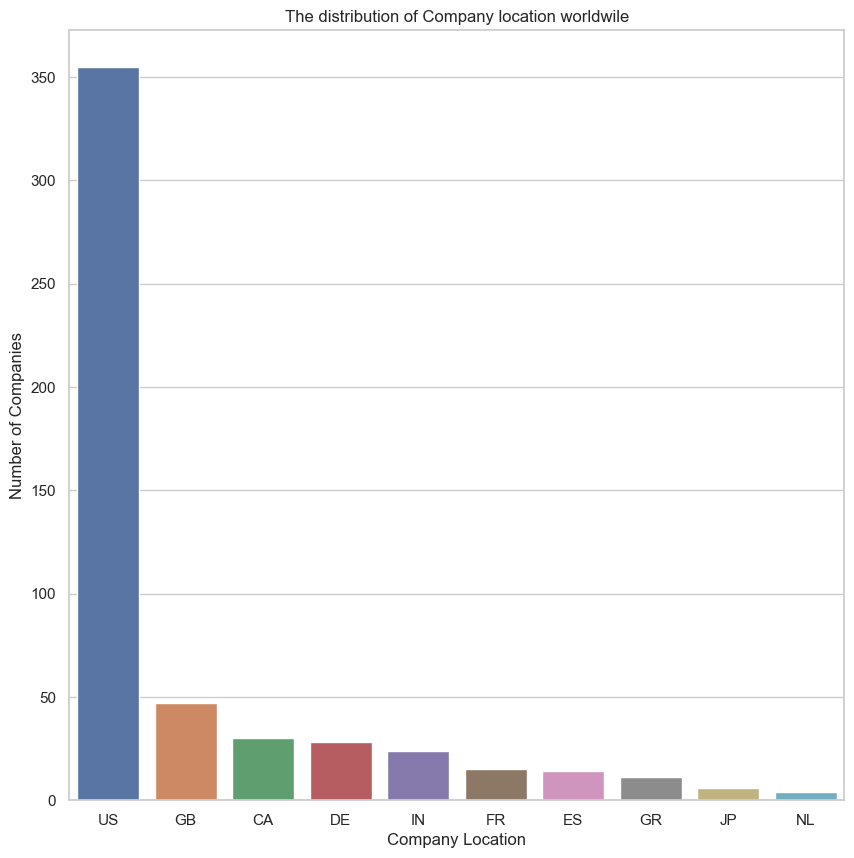

In [30]:
#barplot
plt.figure(figsize = (10,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x=df4['Company Location'].head(10), y= df4['Number of Companies'].head(10), data=df4)
plt.title('The distribution of Company location worldwile')

In [31]:
#Give the correlation of the continuous variables
correlation = df.corr()
print(correlation)

                 SalaryPaidYear    salary  SalaryOnDollars  remote_ratio
SalaryPaidYear         1.000000 -0.087577         0.170493      0.076314
salary                -0.087577  1.000000        -0.083906     -0.014608
SalaryOnDollars        0.170493 -0.083906         1.000000      0.132122
remote_ratio           0.076314 -0.014608         0.132122      1.000000


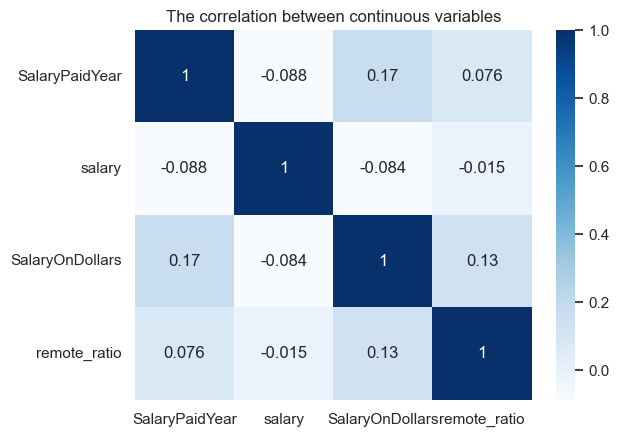

In [32]:
#Observing no correlation at all
heatmap = sns.heatmap(correlation, cmap='Blues', annot=True)
heatmap.set_title('The correlation between continuous variables')
plt.show()

Exacting info via filters

In [33]:
#Give the professionals that have a senior position and their 
#payment on dollars is between 50.000 and 100.000 
filt1 = (df['SalaryOnDollars'] > 50000) & (df['SalaryOnDollars'] < 100000)
filt2 = df['salary_currency'] == 'USD'
filt3 = df['experience_level']== 'Senior'
df[filt1 & filt2 & filt3].job_title.value_counts()

Data Analyst                 18
Data Engineer                 4
Data Scientist                3
Computer Vision Engineer      1
AI Scientist                  1
Data Architect                1
Data Science Engineer         1
Machine Learning Engineer     1
Name: job_title, dtype: int64

In [34]:
#Which is the biggest payment?
df.SalaryOnDollars.max()

600000

In [35]:
#Workers who are Experts & they are paid over 200000 on USD
filt1b = (df['SalaryOnDollars'] > 200000) 
filt2b = df['salary_currency'] == 'USD'
filt3b = df['experience_level']== 'Expert'
df[filt1b & filt2b & filt3b].job_title.value_counts()

Data Engineer               3
Director of Data Science    2
Head of Data                2
Principal Data Scientist    1
Principal Data Engineer     1
Head of Data Science        1
Name: job_title, dtype: int64

In [157]:
#Who is the most well-paid worker
GOAT = df[df['SalaryOnDollars'] == 600000]
print(GOAT)

     SalaryPaidYear experience_level employment_type                job_title  \
252            2021           Expert       full time  Principal Data Engineer   

     salary salary_currency  SalaryOnDollars employee_residence  remote_ratio  \
252  600000             USD           600000                 US           100   

    company_location company_size  
252               US  Large(>250)  


In [36]:
#Give the number of workers that job title contains the word Machine 
#and they were paid on 2021
df.loc[df['SalaryPaidYear'] == 2021]['job_title'].str.contains('Machine').sum()

26

In [37]:
#Give the number of Data Engineer Jobs that been paid on dollars
df.loc[df['salary_currency'] == 'USD']['job_title'].str.contains('Data Engineer').sum()

100

In [38]:
#Give the number of all the professionals living in Greece
#and their job expertise
filt5 = df['employee_residence'] == 'GR'
df.loc[filt5]['job_title'].value_counts()

Data Engineer             5
Data Analyst              3
ETL Developer             2
Data Scientist            1
Marketing Data Analyst    1
Data Science Engineer     1
Name: job_title, dtype: int64

In [85]:
#Grouping via job title
dataRole = df.groupby(['job_title'])

In [84]:
#Give the job title & where they work in
dataRole['company_size'].value_counts().head(15)

job_title                           company_size  
3D Computer Vision Researcher       Medium(50-250)    1
AI Scientist                        Small(<50)        3
                                    Large(>250)       2
                                    Medium(50-250)    2
Analytics Engineer                  Medium(50-250)    4
Applied Data Scientist              Large(>250)       5
Applied Machine Learning Scientist  Large(>250)       2
                                    Medium(50-250)    2
BI Data Analyst                     Large(>250)       2
                                    Medium(50-250)    2
                                    Small(<50)        2
Big Data Architect                  Medium(50-250)    1
Big Data Engineer                   Large(>250)       4
                                    Medium(50-250)    2
                                    Small(<50)        2
Name: company_size, dtype: int64

In [42]:
#Give the number of AI Scientists and the company size working with
dataRole['company_size'].value_counts().loc['AI Scientist']

company_size
Small(<50)        3
Large(>250)       2
Medium(50-250)    2
Name: company_size, dtype: int64

In [44]:
#Give the meadian sallary on dollars of Data Scientists
dataRole['SalaryOnDollars'].median().loc['Data Scientist']

103691.0

In [58]:
#Some statistical parameters of Data Roles
data = dataRole['SalaryOnDollars'].agg(['median','mean','min','max'])
data

,median,mean,min,max
job_title,,,,
3D Computer Vision Researcher,5409.0,5409.000000,5409,5409
AI Scientist,45896.0,66135.571429,12000,200000
Analytics Engineer,179850.0,175000.000000,135000,205300
Applied Data Scientist,157000.0,175655.000000,54238,380000
Applied Machine Learning Scientist,56700.0,142068.750000,31875,423000
BI Data Analyst,76500.0,74755.166667,9272,150000
Big Data Architect,99703.0,99703.000000,99703,99703
Big Data Engineer,41305.5,51974.000000,5882,114047
Business Data Analyst,70912.0,76691.200000,18442,135000


In [59]:
#Change columns name
data.rename(columns={'median' : 'Median', 'mean' : 'Average', 
                     'min' : 'Minimum', 'max' : 'Maximum'}, inplace=True)

In [61]:
data.head()

,Median,Average,Minimum,Maximum
job_title,,,,
3D Computer Vision Researcher,5409.0,5409.000000,5409,5409
AI Scientist,45896.0,66135.571429,12000,200000
Analytics Engineer,179850.0,175000.000000,135000,205300
Applied Data Scientist,157000.0,175655.000000,54238,380000
Applied Machine Learning Scientist,56700.0,142068.750000,31875,423000


In [56]:
#Give the characteristics of the 11th worker
data.iloc[10]

Median      26304.500000
Average     44419.333333
Minimum     10000.000000
Maximum    125000.000000
Name: Computer Vision Engineer, dtype: float64

In [64]:
#Sorting
data.sort_values(by='Maximum', ascending=False, inplace=True)
data

,Median,Average,Minimum,Maximum
job_title,,,,
Principal Data Engineer,200000.0,328333.333333,185000,600000
Research Scientist,76263.5,109019.500000,42000,450000
Financial Data Analyst,275000.0,275000.000000,100000,450000
Applied Machine Learning Scientist,56700.0,142068.750000,31875,423000
Principal Data Scientist,173762.0,215242.428571,148261,416000
Data Scientist,103691.0,108187.832168,2859,412000
Data Analytics Lead,405000.0,405000.000000,405000,405000
Applied Data Scientist,157000.0,175655.000000,54238,380000
Director of Data Science,168000.0,195074.000000,130026,325000
